# Loading libraries

In [9]:
library(dplyr)
library(sjPlot)
library(sjmisc)
library(ggplot2)
# library(mvabund)
library(lme4)
library(lmerTest)
library(MASS)
library(simr)
library(emmeans)

Warning message:
“package ‘emmeans’ was built under R version 4.2.2”


# Loading data

In [4]:
matchedData <- read.csv('./Mouse_matchedAAV_perNeuron_PeakValues.csv')
matchedData$Time <- as.factor(matchedData$Time)
matchedData$Treatment <- as.factor(matchedData$Treatment)
matchedData$plate_ID <- paste(matchedData$Exp,matchedData$Plate)
matchedData$plate_ID <- as.factor(matchedData$plate_ID)
matchedData$Neuron_Group <- as.factor(matchedData$Neuron_Group)
matchedData$Treatment = relevel(matchedData$Treatment,ref="Vehicle")
matchedData

X,Treatment,Time,Plate,Exp,Neuron_Group,r.crit,NMax,plate_ID
<int>,<fct>,<fct>,<chr>,<int>,<fct>,<dbl>,<dbl>,<fct>
0,BDNF,DIV5,A,147,147-ctx-A-14right-0,94,5,147 A
1,BDNF,DIV5,A,147,147-ctx-A-9right-0,94,7,147 A
2,BDNF,DIV5,A,147,147-ctx-A-N2-0,178,6,147 A
3,BDNF,DIV5,A,147,147-ctx-A-N2-1,107,4,147 A
4,BDNF,DIV5,A,147,147-ctx-A-P6-0,149,5,147 A
5,BDNF,DIV5,A,147,147-ctx-A-T12-0,98,8,147 A
6,BDNF,DIV5,A,157,157-ctx-A-A0-0,65,3,157 A
7,BDNF,DIV5,A,157,157-ctx-A-A0-1,105,6,157 A
8,BDNF,DIV5,A,157,157-ctx-A-E1-0,77,10,157 A


# Data overview

Number of neurons per group

      
       Vehicle BDNF
  DIV5      48   48
  DIV7      48   48


Arborization change over 48h

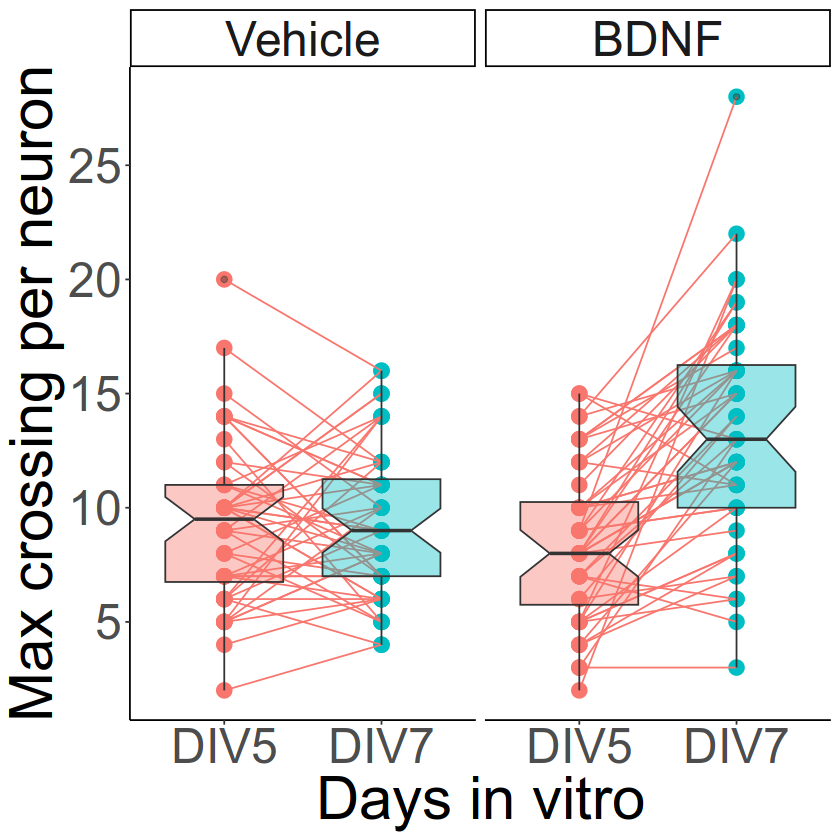

In [39]:
cat("Number of neurons per group")
table(matchedData$Time, matchedData$Treatment)

cat("\nArborization change over 48h")
ggplot(matchedData, aes(x = Time, y = NMax)) + 
geom_point(aes(color = Time),size = 4) + 
geom_line(aes(group = Neuron_Group, color = Time)) + 
geom_boxplot(aes(fill = Time), alpha = .4, notch=TRUE,) +
scale_y_continuous(n.breaks=6)+

theme_classic() +
theme(text = element_text(size = 36),legend.position="none") +
facet_wrap(~ Treatment) +
ylab('Max crossing per neuron') + 
xlab('Days in vitro')

# Statistical analysis

## Model fit and summary

In [7]:
matchedData.glmerPoisson <- glmer(NMax ~ Time*Treatment + (1|Neuron_Group), 
                                  family="poisson",data=matchedData,
                                 glmerControl(optimizer ='optimx', optCtrl=list(method='nlminb'))
                                 )

summary(matchedData.glmerPoisson)

Loading required namespace: optimx



Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: poisson  ( log )
Formula: NMax ~ Time * Treatment + (1 | Neuron_Group)
   Data: matchedData
Control: glmerControl(optimizer = "optimx", optCtrl = list(method = "nlminb"))

     AIC      BIC   logLik deviance df.resid 
  1042.3   1058.6   -516.2   1032.3      187 

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-2.20418 -0.63526  0.00234  0.48479  2.25569 

Random effects:
 Groups       Name        Variance Std.Dev.
 Neuron_Group (Intercept) 0.04751  0.218   
Number of obs: 192, groups:  Neuron_Group, 96

Fixed effects:
                        Estimate Std. Error z value Pr(>|z|)    
(Intercept)             2.211114   0.057031  38.771  < 2e-16 ***
TimeDIV7               -0.004478   0.066695  -0.067    0.946    
TreatmentBDNF          -0.100556   0.081745  -1.230    0.219    
TimeDIV7:TreatmentBDNF  0.465819   0.091873   5.070 3.97e-07 ***
---
Signif. codes:  0 ‘***’ 0

## Growth analysis per group
1. Calculation of estimates using the model
2. Testing of growth changes withing treatment groups

In [10]:
emm1 = emmeans(matchedData.glmerPoisson, specs = ~ Time*Treatment)
emm1

 Time Treatment emmean     SE  df asymp.LCL asymp.UCL
 DIV5 Vehicle     2.21 0.0570 Inf      2.10      2.32
 DIV7 Vehicle     2.21 0.0571 Inf      2.09      2.32
 DIV5 BDNF        2.11 0.0591 Inf      1.99      2.23
 DIV7 BDNF        2.57 0.0508 Inf      2.47      2.67

Results are given on the log (not the response) scale. 
Confidence level used: 0.95 

In [11]:
NB_V_DIV5  = c(1, 0, 0, 0)
NB_V_DIV7  = c(0, 1, 0, 0)
NB_B_DIV5  = c(0, 0, 1, 0)
NB_B_DIV7  = c(0, 0, 0, 1)

NB_V = NB_V_DIV7-NB_V_DIV5
NB_B = NB_B_DIV7-NB_B_DIV5

contrast(emm1, method = list("Vehicle: DIV7-DIV5" = NB_V,
                             "BDNF: DIV7-DIV5" = NB_B
                            ), adjust = 'Sidak' )

 contrast           estimate     SE  df z.ratio p.value
 Vehicle: DIV7-DIV5 -0.00448 0.0667 Inf  -0.067  0.9971
 BDNF: DIV7-DIV5     0.46134 0.0632 Inf   7.301  <.0001

Results are given on the log (not the response) scale. 
P value adjustment: sidak method for 2 tests 

## Confidence interval estimation of the model estimates
For representation purposes

In [25]:
Y <- confint(matchedData.glmerPoisson,method='boot',oldNames=FALSE)

Computing bootstrap confidence intervals ...


2 warning(s): convergence code 1 from optimx: none (and others)




In [35]:
fixed_effects <- fixef(matchedData.glmerPoisson)
y1 <- Y[-1,]
CI_data <- as.data.frame(cbind(fixed_effects,y1))
colnames(CI_data)[1:3] <- c("Mean", "CI_lower","CI_upper")
exp(CI_data)

,Mean,CI_lower,CI_upper
,<dbl>,<dbl>,<dbl>
(Intercept),9.1258810,8.1791087,10.141564
TimeDIV7,0.9955320,0.8690599,1.139038
TreatmentBDNF,0.9043341,0.7690111,1.064644
TimeDIV7:TreatmentBDNF,1.5933185,1.3194315,1.915467
